# Proyecto W2: limpieza y disputa de datos

##### En este proyecto tenemos un dataset llamado Shark Attack, en el que tenemos que limpiar los datos y manipularlos con Pandas. Para ello comenzaremos por instalar e importar algunas librerías.

In [3675]:
%pip install ipython
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3676]:
import pandas as pd
import numpy as np

import pylab as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3677]:
#Cargamos data desde attacks.csv latin1 = ISO-8859-1

data = pd.read_csv('../data/attacks.csv', encoding = 'ISO-8859-1')

In [3678]:
#Guardamos una copia del original

data_orig = data.copy()

In [3679]:
# Vemos las 5 primeras filas del dataset para hacernos una idea sobre que columnas escoger para su posterior limpieza.
data_orig.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [3680]:
#Vemos las dimensiones que tiene el dataset. En este caso tenemos 25723 filas y 24 columnas.

data_orig.shape

(25723, 24)

In [3681]:
#Vemos en la informacion el tipo de dato y la memoria que ocupa para proceder a optimizarlo.

data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [3682]:
#cambiamos los espacios y caracteres por otros.

new_cols = [c.lower().rstrip().lstrip().replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_').replace('.', '_').replace(':', '') for c in data.columns]

new_cols

['case_number',
 'date',
 'year',
 'type',
 'country',
 'area',
 'location',
 'activity',
 'name',
 'sex',
 'age',
 'injury',
 'fatal_y_n',
 'time',
 'species',
 'investigator_or_source',
 'pdf',
 'href_formula',
 'href',
 'case_number_1',
 'case_number_2',
 'original_order',
 'unnamed_22',
 'unnamed_23']

In [3683]:
dict(zip(data_orig.columns, new_cols))

{'Case Number': 'case_number',
 'Date': 'date',
 'Year': 'year',
 'Type': 'type',
 'Country': 'country',
 'Area': 'area',
 'Location': 'location',
 'Activity': 'activity',
 'Name': 'name',
 'Sex ': 'sex',
 'Age': 'age',
 'Injury': 'injury',
 'Fatal (Y/N)': 'fatal_y_n',
 'Time': 'time',
 'Species ': 'species',
 'Investigator or Source': 'investigator_or_source',
 'pdf': 'pdf',
 'href formula': 'href_formula',
 'href': 'href',
 'Case Number.1': 'case_number_1',
 'Case Number.2': 'case_number_2',
 'original order': 'original_order',
 'Unnamed: 22': 'unnamed_22',
 'Unnamed: 23': 'unnamed_23'}

In [3684]:
data_orig = data_orig.rename(columns={k:v for k,v in zip(data_orig.columns, new_cols)}) # k=columna vieja, v= columna nueva

data_orig.head()

,case_number,date,year,type,country,area,location,activity,name,sex,...,species,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed_22,unnamed_23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [3685]:
# Cmabiamos el nombre de alguna columna.

data_orig.rename(columns = {'case_number':'date','date':'date_2'}, inplace=True)

data_orig.columns

Index(['date', 'date_2', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal_y_n', 'time',
       'species', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number_1', 'case_number_2', 'original_order', 'unnamed_22',
       'unnamed_23'],
      dtype='object')

In [3686]:
for c in data_orig:
    print(c)

date
date_2
year
type
country
area
location
activity
name
sex
age
injury
fatal_y_n
time
species
investigator_or_source
pdf
href_formula
href
case_number_1
case_number_2
original_order
unnamed_22
unnamed_23


##### OPTIMIZACIÓN DE MEMORIA

In [3687]:
# Pasamos de object a category para que ocupe menos memoria nuesto dataset.

for c in data.select_dtypes('object').columns:
    data[c]=data[c].astype('category')

In [3688]:
# Vemos como efectivamente cambia y se optimiza la memoria.

data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Case Number             8702 non-null   category
 1   Date                    6302 non-null   category
 2   Year                    6300 non-null   float64 
 3   Type                    6298 non-null   category
 4   Country                 6252 non-null   category
 5   Area                    5847 non-null   category
 6   Location                5762 non-null   category
 7   Activity                5758 non-null   category
 8   Name                    6092 non-null   category
 9   Sex                     5737 non-null   category
 10  Age                     3471 non-null   category
 11  Injury                  6274 non-null   category
 12  Fatal (Y/N)             5763 non-null   category
 13  Time                    2948 non-null   category
 14  Species               

##### ELIMINACIÓN DE DUPLICADOS

In [3689]:
# Nos muestra los elementos duplicados.

data_orig[data_orig.duplicated(keep=False)]

,date,date_2,year,type,country,area,location,activity,name,sex,...,species,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed_22,unnamed_23
6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6310,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6311,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6312,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6313,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3690]:
# Eliminamos los elementos duplicados.

data_orig.drop_duplicates(inplace=True)

In [3691]:
# Vemos como se quedan las filas tras aplicar la eliminación de duplicados.

data_orig.shape

(6312, 24)

##### VALORES NULOS / NULL VALUES

In [3693]:
# Suma los valores nulos que tenemos en cada columna.

nan_cols = data_orig.isna().sum()

In [3694]:
# Nos muestra la suma de valores nulos en cada columna
nan_cols[nan_cols>0]

date                         2
date_2                      10
year                        12
type                        14
country                     60
area                       465
location                   550
activity                   554
name                       220
sex                        575
age                       2841
injury                      38
fatal_y_n                  549
time                      3364
species                   2848
investigator_or_source      27
pdf                         10
href_formula                11
href                        10
case_number_1               10
case_number_2               10
original_order               3
unnamed_22                6311
unnamed_23                6310
dtype: int64

In [3695]:
# Vemos el valor total de nulos en nuestro dataset 

len(data_orig)

6312

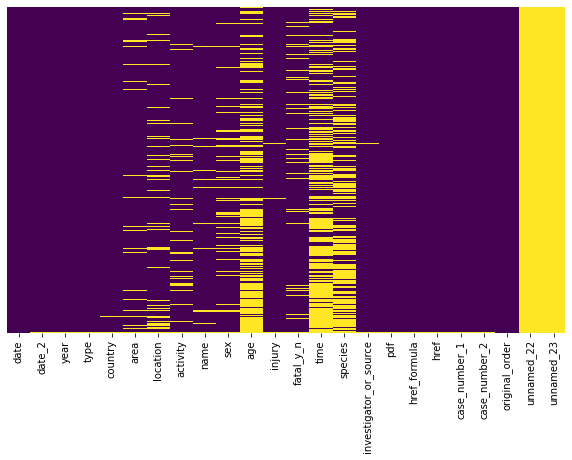

In [3696]:
# Comprovamos lo nulos que hay en nuestro dataset con esta gráfica.

plt.figure(figsize=(10,6))

sns.heatmap(data_orig.isna(),
           yticklabels=False,
           cmap='viridis',
           cbar = False)

plt.show()

##### LIMPIEZA DE RUIDO POR COLUMNAS, PASANDO NULOS Y OTROS VALORES QUE NO UTILIZAREMOS A UNKNOWN

In [3697]:
# Miramos que elementos unicos hay en las columnas unnamed_22 y unnamed_23.

data_orig.unnamed_22.unique()

array([nan, 'stopped here'], dtype=object)

In [3698]:
data_orig.unnamed_23.unique()

array([nan, 'Teramo', 'change filename'], dtype=object)

In [3699]:
# Pasamos todos los elementos a unknown.

data_orig['unnamed_22'] = 'unknown'
data_orig['unnamed_23'] = 'unknown'

In [3700]:
# Comprobamos que se ha transformado todo a unknown.

print(data_orig.unnamed_22.unique())
print(data_orig.unnamed_23.unique())

['unknown']
['unknown']


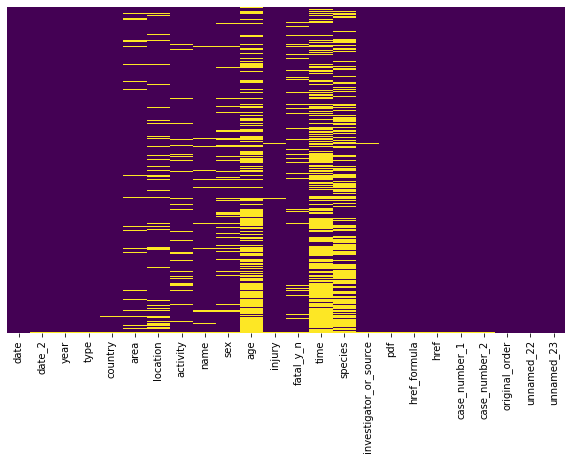

In [3701]:
# Vemos en la grafica los valores nulos que hemos quitado.

plt.figure(figsize=(10,6))

sns.heatmap(data_orig.isna(),
           yticklabels=False,
           cmap='viridis',
           cbar = False)

plt.show()

In [3702]:
# Recuento de las dimensiones de filas y columnas.

data_orig.shape

(6312, 24)

In [3703]:
# Recuento de nulos por cada columna.

nan_cols = data_orig.isna().sum() 
nan_cols

date                         2
date_2                      10
year                        12
type                        14
country                     60
area                       465
location                   550
activity                   554
name                       220
sex                        575
age                       2841
injury                      38
fatal_y_n                  549
time                      3364
species                   2848
investigator_or_source      27
pdf                         10
href_formula                11
href                        10
case_number_1               10
case_number_2               10
original_order               3
unnamed_22                   0
unnamed_23                   0
dtype: int64

In [3704]:
print('Número de datos nulos de las columnas que nos interesan para los insights ataques de tiburones:')
print('year:',data_orig['year'].isna().sum())
print('country:',data_orig['country'].isna().sum())
print('sex:',data_orig['sex'].isna().sum())
print('age:',data_orig['age'].isna().sum())
print('fatal_y_n:',data_orig['fatal_y_n'].isna().sum())
print('species:',data_orig['species'].isna().sum())

Número de datos nulos de las columnas que nos interesan para los insights ataques de tiburones:
year: 12
country: 60
sex: 575
age: 2841
fatal_y_n: 549
species: 2848


In [3705]:
data_orig.shape

(6312, 24)

##### ELIMINACIÓN DE NULOS QUE COINCIDEN ENTRE VARIAS COLUMNAS

In [3706]:
# Eliminamos los valores nulos que coinciden en las columnas age, species y time ya que son las que más nulos tenían.

no_local = data_orig[data_orig.age.isnull() & data_orig.species.isnull() & data_orig.time.isnull()].index
data_orig.drop(no_local, axis=0, inplace=True)

In [3707]:
data_orig.shape

(4997, 24)

In [3708]:
# Eliminamos los valores nulos que coinciden en las columnas age y time.

no_local = data_orig[data_orig.age.isnull() & data_orig.time.isnull()].index
data_orig.drop(no_local, axis=0, inplace=True)

In [3709]:
data_orig.shape

(4063, 24)

In [3710]:
# Eliminamos los valores nulos que coinciden en las columnas age y species.

no_local = data_orig[data_orig.age.isnull() & data_orig.species.isnull()].index
data_orig.drop(no_local, axis=0, inplace=True)

In [3711]:
data_orig.shape

(3808, 24)

In [3712]:
# Eliminamos los valores nulos que coinciden en las columnas time y species.

no_local = data_orig[data_orig.time.isnull() & data_orig.species.isnull()].index
data_orig.drop(no_local, axis=0, inplace=True)

In [3713]:
data_orig.shape

(3313, 24)

In [3714]:
# Recuento de datos nulos de las columnas que nos interesan.

print('Número de datos nulos de las columnas que nos interesan para los insights ataques de tiburones:')
print('year:',data_orig['year'].isna().sum())
print('country:',data_orig['country'].isna().sum())
print('sex:',data_orig['sex'].isna().sum())
print('age:',data_orig['age'].isna().sum())
print('fatal_y_n:',data_orig['fatal_y_n'].isna().sum())
print('species:',data_orig['species'].isna().sum())

Número de datos nulos de las columnas que nos interesan para los insights ataques de tiburones:
year: 1
country: 7
sex: 84
age: 337
fatal_y_n: 269
species: 783


##### ELIMINADO DE NULOS DE LA COLUMNA SPECIES

In [3715]:
data_orig['species'].isna().sum()

783

In [3716]:
data_orig.species.nunique()

1218

In [3717]:
data_orig[data_orig['species'].isna()]

,date,date_2,year,type,country,area,location,activity,name,sex,...,species,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed_22,unnamed_23
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,unknown,unknown
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,unknown,unknown
9,2018.05.26.a,26-May-2018,2018.0,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Standing,male,M,...,NaN,"K. McMurray, Tracking Sharks.com",2018.05.26.a-DaytonaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.a,2018.05.26.a,6294.0,unknown,unknown
12,2018.05.13.b,13-May-2018,2018.0,Unprovoked,USA,South Carolina,"Hilton Head Island, Beaufort County",Swimming,Jei Turrell,M,...,NaN,"C. Creswell, GSAF & K. McMurray TrackingSharks...",2018.05.13.b-Turrell.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.13.b,2018.05.13.b,6291.0,unknown,unknown
29,2018.04.15.a,15-Apr-2018,2018.0,Unprovoked,AUSTRALIA,Western Australia,"Cobblestones, Margaret River Area",Surfing,Alejandro Travaglini,M,...,NaN,"B.Myatt, GSAF",2018.04.15.a-Travaglini.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.15.a,2018.04.15.a,6274.0,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5991,1858.03.14,14-Mar-1858,1858.0,Unprovoked,AUSTRALIA,Victoria,Hobson Bay,Bathing,Adolphe Bollander,M,...,NaN,"Moreton Bay Courier, 3/31/1858",1858.03.14-Bollander.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1858.03.14,1858.03.14,312.0,unknown,unknown
6077,1837.01.17,17-Jan-1837,1837.0,Unprovoked,AUSTRALIA,New South Wales,Macleay River,Washing his feet,Alfred Australia Howe,M,...,NaN,Gazette (Sydney) 1/31/1837; Proc. Royal Aust. ...,1837.01.17-Howe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1837.01.17,1837.01.17,226.0,unknown,unknown
6114,1817.05.11,11-May-1817,1817.0,Unprovoked,SRI LANKA,Western Province,Colombo,Swimming,William May,M,...,NaN,Edinburgh Advertiser. 11/4/1817; R. DeSilva,1817.05.11-May.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1817.05.11,1817.05.11,189.0,unknown,unknown
6160,1703.03.26,26-Mar-1703,1703.0,Unprovoked,BARBADOS,Southwest coast,Carlisle Bay,Swimming,"Samuel Jennings, a deserter from the British f...",M,...,NaN,"W.R.Cutter, Vol.1, p.252",1703.03.26-Jennings.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1703.03.26,1703.03.26,143.0,unknown,unknown


In [3718]:
# Eliminamos los valores nulos de la columna species.

index_species = data_orig[data_orig['species'].isna()].index
data_orig.drop(index= index_species, inplace = True)

In [3719]:
# Recuento de filas y columnas.

data_orig.shape

(2530, 24)

In [3720]:
nan_cols = data_orig.isna().sum() 
nan_cols

date                        0
date_2                      0
year                        1
type                        0
country                     7
area                       64
location                   66
activity                   72
name                       13
sex                        80
age                       337
injury                      3
fatal_y_n                 267
time                      620
species                     0
investigator_or_source      4
pdf                         0
href_formula                0
href                        0
case_number_1               0
case_number_2               0
original_order              0
unnamed_22                  0
unnamed_23                  0
dtype: int64

##### ELIMINADO DE NULOS DE LA COLUMNA AGE

In [3723]:
# Eliminamos los valores nulos de la columna age.
index_species = data_orig[data_orig['age'].isna()].index
data_orig.drop(index= index_species, inplace = True)

In [3724]:
# Recuento de filas y columnas.

data_orig.shape

(2193, 24)

In [3725]:
nan_cols = data_orig.isna().sum() 
nan_cols

date                        0
date_2                      0
year                        1
type                        0
country                     3
area                       52
location                   56
activity                   63
name                        5
sex                        16
age                         0
injury                      0
fatal_y_n                 220
time                      620
species                     0
investigator_or_source      4
pdf                         0
href_formula                0
href                        0
case_number_1               0
case_number_2               0
original_order              0
unnamed_22                  0
unnamed_23                  0
dtype: int64

##### LIMPIEZA DE LOS ELEMENTOS DE LA COLUMNA SPECIE

In [3726]:
# Vemos los elementos de la columna species.

data_orig.species.unique()

array(['White shark', 'Tiger shark', "Lemon shark, 3'", ...,
       "Nurse shark, 2.1 m [7'] ", '"A pack of sharks"',
       "12' tiger shark"], dtype=object)

In [3727]:
# white_shark
data_orig.loc[data_orig['species'].str.contains('white', case = False), 'species'] = 'white_shark'

# tiger_shark
data_orig.loc[data_orig['species'].str.contains('tiger', case = False), 'species'] = 'tiger_shark'

# bull_shark
data_orig.loc[data_orig['species'].str.contains('bull', case = False), 'species'] = 'bull_shark'

# nurse_shark
data_orig.loc[data_orig['species'].str.contains('nurse', case = False), 'species'] = 'nurse_shark'

# zambesi_shark
data_orig.loc[data_orig['species'].str.contains('zambesi', case = False), 'species'] = 'zambesi_shark'
data_orig.loc[data_orig['species'].str.contains('zambezi', case = False), 'species'] = 'zambesi_shark'

# wobbegong_shark
data_orig.loc[data_orig['species'].str.contains('wobbegong', case = False), 'species'] = 'wobbegong_shark'

# blue_shark
data_orig.loc[data_orig['species'].str.contains('blue', case = False), 'species'] = 'blue_shark'

# bronze_whaler_shark
data_orig.loc[data_orig['species'].str.contains('bronze', case = False), 'species'] = 'bronze_whaler_shark'

# blacktip_shark
data_orig.loc[data_orig['species'].str.contains('black', case = False), 'species'] = 'blacktip_shark'

# hammerhead_shark
data_orig.loc[data_orig['species'].str.contains('hammerhead', case = False), 'species'] = 'hammerhead_shark'

# lemon_shark
data_orig.loc[data_orig['species'].str.contains('lemon', case = False), 'species'] = 'lemon_shark'

# mako_shark
data_orig.loc[data_orig['species'].str.contains('mako', case = False), 'species'] = 'mako_shark'

# raggedtooth_shark
data_orig.loc[data_orig['species'].str.contains('raggedtooth', case = False), 'species'] = 'raggedtooth_shark'

# caribbean_reef_shark
data_orig.loc[data_orig['species'].str.contains('caribbean', case = False), 'species'] = 'caribbean_reef_shark'

# dusky_shark
data_orig.loc[data_orig['species'].str.contains('dusky', case = False), 'species'] = 'dusky_shark'

# sand_shark
data_orig.loc[data_orig['species'].str.contains('sand', case = False), 'species'] = 'sand_shark'

# angel_shark
data_orig.loc[data_orig['species'].str.contains('angel', case = False), 'species'] = 'angel_shark'

# grey_reef_shark
data_orig.loc[data_orig['species'].str.contains('grey', case = False), 'species'] = 'grey_reef_shark'

# dogfish_shark
data_orig.loc[data_orig['species'].str.contains('dogfish', case = False), 'species'] = 'dogfish_shark'

# galapagos_shark
data_orig.loc[data_orig['species'].str.contains('galapagos', case = False), 'species'] = 'galapagos_shark'

# spinner_shark
data_orig.loc[data_orig['species'].str.contains('spinner', case = False), 'species'] = 'spinner_shark'

# copper_shark
data_orig.loc[data_orig['species'].str.contains('copper', case = False), 'species'] = 'copper_shark'

# spurdog_shark
data_orig.loc[data_orig['species'].str.contains('spurdog', case = False), 'species'] = 'spurdog_shark'

# porbeagle_shark
data_orig.loc[data_orig['species'].str.contains('porbeagle', case = False), 'species'] = 'porbeagle_shark'

# ocean_whitetip_shark
data_orig.loc[data_orig['species'].str.contains('whitetip', case = False), 'species'] = 'ocean_whitetip_shark'

# port_jackson_shark
data_orig.loc[data_orig['species'].str.contains('port', case = False), 'species'] = 'port_jackson_shark'

# cookie_cutter_shark
data_orig.loc[data_orig['species'].str.contains('cookie', case = False), 'species'] = 'cookie_cutter_shark'

# thresher_shark
data_orig.loc[data_orig['species'].str.contains('thresher', case = False), 'species'] = 'thresher_shark'




In [3728]:
data_orig.species.unique()

array(['white_shark', 'tiger_shark', 'lemon_shark', 'bull_shark',
       'grey_reef_shark', 'Invalid incident', 'nurse_shark', '3 m shark',
       "6' shark", 'Shark involvement not confirmed', 'wobbegong_shark',
       '3.5 m shark', '1.8 m shark', 'blacktip_shark',
       'Injury believed caused by an eel, not a shark', 'galapagos_shark',
       '2m shark', 'small shark', '2 m shark', 'cookie_cutter_shark',
       "8' shark", 'Death may have been due to drowning', 'Questionable',
       'porbeagle_shark', "5' to 6' shark",
       'Shark involvement questionable', "4' shark", 'A small shark',
       '"A small shark"', '3m shark, probably a smooth hound', "3' shark",
       "9' shark", 'Shark involvement highly doubtful',
       'Shark involvement prior to death not confirmed', "10' shark",
       'caribbean_reef_shark', 'Broadnose sevengill shark, 1.5 m',
       " 6' to 8' shark", "3' to 4' shark", 'blue_shark',
       'reef shark, 1m', 'angel_shark', 'dogfish_shark', "3' to 5' shark"

In [3729]:
#Guardamos una copia del original de control hasta aqui.
data_sharks = data_orig.copy()

In [3730]:
# unknown_shark
data_sharks.loc[data_sharks['species'].str.contains('xa0', case = False), 'species'] = 'unknown_shark'
data_sharks.loc[data_orig['species'].str.contains('shark involvement', case = False), 'species'] = 'unknown_shark'
data_sharks.loc[data_orig['species'].str.contains('shark seen', case = False), 'species'] = 'unknown_shark'
data_sharks.loc[data_orig['species'].str.contains('species unidentified', case = False), 'species'] = 'unknown_shark'
data_sharks.loc[data_orig['species'].str.contains('small', case = False), 'species'] = 'unknown_shark'
data_sharks.loc[data_orig['species'].str.contains('unidentified', case = False), 'species'] = 'unknown_shark'
data_sharks.loc[data_orig['species'].str.contains('unknown', case = False), 'species'] = 'unknown_shark'
data_sharks.loc[data_orig['species'].str.contains('questionable', case = False), 'species'] = 'unknown_shark'
data_sharks.loc[data_orig['species'].str.contains('invalid incident', case = False), 'species'] = 'unknown_shark'
data_sharks.loc[data_orig['species'].str.contains('invalid', case = False), 'species'] = 'unknown_shark'
data_sharks.loc[data_orig['species'].str.contains('Not authenticated', case = False), 'species'] = 'unknown_shark'
data_sharks.loc[data_orig['species'].str.contains('juvenile', case = False), 'species'] = 'unknown_shark'
data_sharks.loc[data_orig['species'].str.contains('hoax', case = False), 'species'] = 'unknown_shark'
data_sharks.loc[data_orig['species'].str.contains('"', case = False), 'species'] = 'unknown_shark'
data_sharks.loc[data_orig['species'].str.contains("'", case = False), 'species'] = 'unknown_shark'
data_sharks.loc[data_orig['species'].str.contains("C. ", case = False), 'species'] = 'unknown_shark'
data_sharks.loc[data_orig['species'].str.contains("\xa0", case = False), 'species'] = 'unknown_shark'
data_sharks.loc[data_orig['species'].str.contains("0", case = False), 'species'] = 'unknown_shark'
data_sharks.loc[data_orig['species'].str.contains("1", case = False), 'species'] = 'unknown_shark'
data_sharks.loc[data_orig['species'].str.contains("2", case = False), 'species'] = 'unknown_shark'
data_sharks.loc[data_orig['species'].str.contains("3", case = False), 'species'] = 'unknown_shark'
data_sharks.loc[data_orig['species'].str.contains("4", case = False), 'species'] = 'unknown_shark'
data_sharks.loc[data_orig['species'].str.contains("7", case = False), 'species'] = 'unknown_shark'
data_sharks.loc[data_orig['species'].str.contains("Dooley believed", case = False), 'species'] = 'unknown_shark'
data_sharks.loc[data_orig['species'].str.contains("According to", case = False), 'species'] = 'unknown_shark'
data_sharks.loc[data_orig['species'].str.contains(" ", case = False), 'species'] = 'unknown_shark'

In [3731]:
data_sharks.species.unique()

array(['white_shark', 'tiger_shark', 'lemon_shark', 'bull_shark',
       'grey_reef_shark', 'unknown_shark', 'nurse_shark',
       'wobbegong_shark', 'blacktip_shark', 'galapagos_shark',
       'cookie_cutter_shark', 'porbeagle_shark', 'caribbean_reef_shark',
       'blue_shark', 'angel_shark', 'dogfish_shark', 'mako_shark',
       'bronze_whaler_shark', 'spinner_shark', 'hammerhead_shark',
       'raggedtooth_shark', 'sand_shark', 'port_jackson_shark',
       'zambesi_shark', 'thresher_shark', 'spurdog_shark', 'dusky_shark',
       'copper_shark'], dtype=object)

In [3732]:
# Número de especies de tiburón que nos quedan. 

data_sharks.species.nunique()

28

In [3733]:
# Recuento de las filas y columnas.

data_sharks.shape

(2193, 24)

##### ELIMINACIÓN DE VALORES NULOS DE LA COLUMNA COUNTRY

In [3734]:
# Miramos el nulo que tiene country.
data_sharks[data_sharks['country'].isna()]

,date,date_2,year,type,country,area,location,activity,name,sex,...,species,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed_22,unnamed_23
3399,1970.02.05,5-Feb-1970,1970.0,Unprovoked,NaN,NaN,NaN,Wading,Sally Anne Irvine,F,...,unknown_shark,H.D. Baldridge (1994) SAF Case #1626,1970.02.05-NV-Irvine.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.02.05,1970.02.05,2904.0,unknown,unknown
3661,1964.09.27,27-Sep-1964,1964.0,Invalid,NaN,NaN,NaN,Spearfishing,Giancarlo Griffon,M,...,unknown_shark,C. Moore. GSAF,1964.09.27-Griffon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1964.09.27,1964.09.27,2642.0,unknown,unknown
5425,1909.01.17,17-Jan-1909,1909.0,Invalid,NaN,NaN,Near the equator,Jumped overboard,Thomas Butler,M,...,unknown_shark,"Star, 3/18/1909",1909.01.17-Butler.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1909.01.17,1909.01.17,878.0,unknown,unknown


In [3735]:
# Eliminamos los valores nulos de la columna country ya que vemos que esa muestra no nos va a aportar nada.
index_country = data_sharks[data_sharks['country'].isna()].index
data_sharks.drop(index= index_country, inplace = True)

In [3736]:

nan_cols = data_sharks.isna().sum() 
nan_cols

date                        0
date_2                      0
year                        1
type                        0
country                     0
area                       49
location                   54
activity                   63
name                        5
sex                        16
age                         0
injury                      0
fatal_y_n                 218
time                      618
species                     0
investigator_or_source      4
pdf                         0
href_formula                0
href                        0
case_number_1               0
case_number_2               0
original_order              0
unnamed_22                  0
unnamed_23                  0
dtype: int64

##### LIMPIEZA DE LOS ELEMENTOS DE LA COLUMNA COUNTRY

In [3737]:
data_sharks.country.unique()

array(['USA', 'BRAZIL', 'AUSTRALIA', 'ENGLAND', 'COSTA RICA', 'MALDIVES',
       'SOUTH AFRICA', 'THAILAND', 'BAHAMAS', 'ECUADOR', 'NEW CALEDONIA',
       'MALAYSIA', 'CUBA', 'SPAIN', 'EGYPT', 'MEXICO', 'REUNION',
       'UNITED KINGDOM', 'PHILIPPINES', 'INDONESIA', 'COLUMBIA',
       'NEW ZEALAND', 'FRENCH POLYNESIA', 'CAPE VERDE', 'CAYMAN ISLANDS',
       'ITALY', 'ST. MARTIN', 'FRANCE', 'JAMAICA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'TAIWAN', 'PAPUA NEW GUINEA', 'RUSSIA',
       'SEYCHELLES', 'TURKS & CAICOS', 'UNITED ARAB EMIRATES (UAE)',
       'MALTA', 'VIETNAM', 'GUAM', 'MOZAMBIQUE', 'BRITISH VIRGIN ISLANDS',
       'NORWAY', 'BELIZE', 'FIJI', 'ATLANTIC OCEAN', 'ST. MAARTIN',
       'GRAND CAYMAN', 'CHINA', 'VANUATU', 'SOUTH KOREA', 'SRI LANKA',
       'JAPAN', 'URUGUAY', 'VENEZUELA', 'INDIA', 'OKINAWA', 'TANZANIA',
       ' TONGA', 'MARSHALL ISLANDS', 'MAURITIUS', 'SENEGAL', 'HONG KONG',
       'CHILE', 'EL SALVADOR', 'CARIBBEAN SEA', 'BERMUDA', 'Fiji',
       'GRE

In [3738]:
# Transformamos estos elementos de paises al que pertenecen 

data_sharks.loc[data_sharks['country'].str.contains('ENGLAND', case = False), 'country'] = 'UNITED KINGDOM'
data_sharks.loc[data_sharks['country'].str.contains('SCOTLAND', case = False), 'country'] = 'UNITED KINGDOM'
data_sharks.loc[data_sharks['country'].str.contains('ST. MARTIN', case = False), 'country'] = 'SAINT MARTIN'
data_sharks.loc[data_sharks['country'].str.contains('ST. MAARTIN', case = False), 'country'] = 'SAINT MARTIN'
data_sharks.loc[data_sharks['country'].str.contains('FEDERATED STATES OF MICRONESIA', case = False), 'country'] = 'MICRONESIA'
data_sharks.loc[data_sharks['country'].str.contains('ANDAMAN / NICOBAR ISLANDAS', case = False), 'country'] = 'ANDAMAN & NICOBAR ISLANDS'
data_sharks.loc[data_sharks['country'].str.contains('BRITISH WEST INDIES', case = False), 'country'] = 'TURKS & CAICOS'
data_sharks.loc[data_sharks['country'].str.contains('COLUMBIA', case = False), 'country'] = 'COLOMBIA'
data_sharks.loc[data_sharks['country'].str.contains('OKINAWA', case = False), 'country'] = 'JAPAN'
data_sharks.loc[data_sharks['country'].str.contains('GRAND CAYMAN', case = False), 'country'] = 'CAYMAN ISLANDS'
data_sharks.loc[data_sharks['country'].str.contains('JOHNSTON ISLAND', case = False), 'country'] = 'USA'
data_sharks.loc[data_sharks['country'].str.contains('NEW BRITAIN', case = False), 'country'] = 'PAPUA NEW GUINEA'
data_sharks.loc[data_sharks['country'].str.contains('PALAU', case = False), 'country'] = 'MICRONESIA'
data_sharks.loc[data_sharks['country'].str.contains('fiji', case = False), 'country'] = 'FIJI'
data_sharks.loc[data_sharks['country'].str.contains('SOUTH CHINA SEA', case = False), 'country'] = 'CHINA'
data_sharks.loc[data_sharks['country'].str.contains(' TONGA', case = False), 'country'] = 'TONGA'


# Añadimos Guam a Micronesia aunque pertenezca a USA ya que fisicamente esta en Micronesia.
data_sharks.loc[data_sharks['country'].str.contains('GUAM', case = False), 'country'] = 'MICRONESIA'



In [3739]:
# Vemos como quedan los elementos de la columna de country tras el primer filtrado.

data_sharks.country.unique()

array(['USA', 'BRAZIL', 'AUSTRALIA', 'UNITED KINGDOM', 'COSTA RICA',
       'MALDIVES', 'SOUTH AFRICA', 'THAILAND', 'BAHAMAS', 'ECUADOR',
       'NEW CALEDONIA', 'MALAYSIA', 'CUBA', 'SPAIN', 'EGYPT', 'MEXICO',
       'REUNION', 'PHILIPPINES', 'INDONESIA', 'COLOMBIA', 'NEW ZEALAND',
       'FRENCH POLYNESIA', 'CAPE VERDE', 'CAYMAN ISLANDS', 'ITALY',
       'SAINT MARTIN', 'FRANCE', 'JAMAICA', 'TONGA', 'CANADA', 'CROATIA',
       'TAIWAN', 'PAPUA NEW GUINEA', 'RUSSIA', 'SEYCHELLES',
       'TURKS & CAICOS', 'UNITED ARAB EMIRATES (UAE)', 'MALTA', 'VIETNAM',
       'MICRONESIA', 'MOZAMBIQUE', 'BRITISH VIRGIN ISLANDS', 'NORWAY',
       'BELIZE', 'FIJI', 'ATLANTIC OCEAN', 'CHINA', 'VANUATU',
       'SOUTH KOREA', 'SRI LANKA', 'JAPAN', 'URUGUAY', 'VENEZUELA',
       'INDIA', 'TANZANIA', 'MARSHALL ISLANDS', 'MAURITIUS', 'SENEGAL',
       'HONG KONG', 'CHILE', 'EL SALVADOR', 'CARIBBEAN SEA', 'BERMUDA',
       'GREECE', 'KENYA', 'NORTH ATLANTIC OCEAN', 'PORTUGAL', 'ISRAEL',
       'WESTERN SAMOA

In [3740]:
index_country = data_sharks[data_sharks['country'] == 'SOUTH ATLANTIC OCEAN'].index 
data_sharks.drop(index = index_country, inplace = True)

index_country = data_sharks[data_sharks['country'] == 'NORTH SEA'].index 
data_sharks.drop(index = index_country, inplace = True)

index_country = data_sharks[data_sharks['country'] == 'NORTH ATLANTIC OCEAN'].index 
data_sharks.drop(index = index_country, inplace = True)

index_country = data_sharks[data_sharks['country'] == 'MID ATLANTIC OCEAN'].index 
data_sharks.drop(index = index_country, inplace = True)

index_country = data_sharks[data_sharks['country'] == 'NORTH PACIFIC OCEAN'].index 
data_sharks.drop(index = index_country, inplace = True)

index_country = data_sharks[data_sharks['country'] == 'PACIFIC OCEAN'].index 
data_sharks.drop(index = index_country, inplace = True)

index_country = data_sharks[data_sharks['country'] == 'CARIBBEAN SEA'].index 
data_sharks.drop(index = index_country, inplace = True)

In [3741]:
# Vemos como quedan los elementos de la columna de country tras el segundo filtrado.

data_sharks.country.unique()

array(['USA', 'BRAZIL', 'AUSTRALIA', 'UNITED KINGDOM', 'COSTA RICA',
       'MALDIVES', 'SOUTH AFRICA', 'THAILAND', 'BAHAMAS', 'ECUADOR',
       'NEW CALEDONIA', 'MALAYSIA', 'CUBA', 'SPAIN', 'EGYPT', 'MEXICO',
       'REUNION', 'PHILIPPINES', 'INDONESIA', 'COLOMBIA', 'NEW ZEALAND',
       'FRENCH POLYNESIA', 'CAPE VERDE', 'CAYMAN ISLANDS', 'ITALY',
       'SAINT MARTIN', 'FRANCE', 'JAMAICA', 'TONGA', 'CANADA', 'CROATIA',
       'TAIWAN', 'PAPUA NEW GUINEA', 'RUSSIA', 'SEYCHELLES',
       'TURKS & CAICOS', 'UNITED ARAB EMIRATES (UAE)', 'MALTA', 'VIETNAM',
       'MICRONESIA', 'MOZAMBIQUE', 'BRITISH VIRGIN ISLANDS', 'NORWAY',
       'BELIZE', 'FIJI', 'ATLANTIC OCEAN', 'CHINA', 'VANUATU',
       'SOUTH KOREA', 'SRI LANKA', 'JAPAN', 'URUGUAY', 'VENEZUELA',
       'INDIA', 'TANZANIA', 'MARSHALL ISLANDS', 'MAURITIUS', 'SENEGAL',
       'HONG KONG', 'CHILE', 'EL SALVADOR', 'BERMUDA', 'GREECE', 'KENYA',
       'PORTUGAL', 'ISRAEL', 'WESTERN SAMOA', 'BRITISH ISLES',
       'NEW GUINEA', 'PANAMA

In [3742]:
data_sharks.shape

(2182, 24)

##### LIMPIEZA DE LOS ELEMENTOS DE LA COLUMNA SEX

In [3743]:
# Miramos los elementos únicos de la columna sex.
data_sharks.sex.unique()

array(['F', 'M', nan, 'lli'], dtype=object)

In [3744]:
index_sex = data_sharks[data_sharks['sex'] == 'lli'].index 
data_sharks.drop(index = index_sex, inplace = True)

In [3745]:
data_sharks.shape

(2181, 24)

In [3746]:
# Eliminamos los valores nulos de la columna sex ya que vemos que esa muestra no nos va a aportar nada.
index_sex = data_sharks[data_sharks['sex'].isna()].index
data_sharks.drop(index= index_sex, inplace = True)

In [3747]:
data_sharks.sex.unique()

array(['F', 'M'], dtype=object)

In [3748]:
# Recuento de filas y columnas.

data_sharks.shape

(2165, 24)

In [3749]:
data_sharks.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2165 entries, 0 to 6276
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    2165 non-null   object 
 1   date_2                  2165 non-null   object 
 2   year                    2164 non-null   float64
 3   type                    2165 non-null   object 
 4   country                 2165 non-null   object 
 5   area                    2120 non-null   object 
 6   location                2113 non-null   object 
 7   activity                2104 non-null   object 
 8   name                    2161 non-null   object 
 9   sex                     2165 non-null   object 
 10  age                     2165 non-null   object 
 11  injury                  2165 non-null   object 
 12  fatal_y_n               1950 non-null   object 
 13  time                    1559 non-null   object 
 14  species                 2165 non-null   

##### LIMPIEZA DE LOS ELEMENTOS DE LA COLUMNA YEAR

In [3750]:
#Vemos los elementos de la columna de year.

data_sharks.year.unique()

array([2018., 2017.,   nan, 2016., 2015., 2014., 2013., 2012., 2011.,
       2010., 2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002.,
       2001., 2000., 1999., 1998., 1997., 1996., 1995., 1994., 1993.,
       1992., 1991., 1990., 1989., 1969., 1988., 1987., 1986., 1985.,
       1984., 1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976.,
       1975., 1974., 1973., 1972., 1971., 1970., 1968., 1967., 1966.,
       1965., 1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957.,
       1956., 1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948.,
       1947., 1946., 1945., 1944., 1943., 1942., 1941., 1940., 1939.,
       1938., 1937., 1936., 1935., 1934., 1933., 1932., 1931., 1930.,
       1929., 1928., 1927., 1926., 1925., 1924., 1922., 1920., 1919.,
       1916., 1912., 1909., 1906., 1905., 1901., 1899., 1898., 1894.,
       1892., 1881., 1880., 1879., 1878., 1868., 1863., 1862., 1852.,
          0.])

In [3751]:
# Eliminamos el elemento 0.

data_sharks.loc[data_sharks['year'] ==0] = None

In [3752]:
# Vemos a ver si se ha eliminado.

data_sharks.year.unique()

array([2018., 2017.,   nan, 2016., 2015., 2014., 2013., 2012., 2011.,
       2010., 2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002.,
       2001., 2000., 1999., 1998., 1997., 1996., 1995., 1994., 1993.,
       1992., 1991., 1990., 1989., 1969., 1988., 1987., 1986., 1985.,
       1984., 1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976.,
       1975., 1974., 1973., 1972., 1971., 1970., 1968., 1967., 1966.,
       1965., 1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957.,
       1956., 1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948.,
       1947., 1946., 1945., 1944., 1943., 1942., 1941., 1940., 1939.,
       1938., 1937., 1936., 1935., 1934., 1933., 1932., 1931., 1930.,
       1929., 1928., 1927., 1926., 1925., 1924., 1922., 1920., 1919.,
       1916., 1912., 1909., 1906., 1905., 1901., 1899., 1898., 1894.,
       1892., 1881., 1880., 1879., 1878., 1868., 1863., 1862., 1852.])

In [3753]:
#Eliminamos el elemento nulo que vemos que sale.

index_year = data_sharks[data_sharks['year'].isna()].index
data_sharks.drop(index= index_year, inplace = True)

In [3754]:
# Vemos a ver si se ha eliminado.

data_sharks.year.unique()

array([2018., 2017., 2016., 2015., 2014., 2013., 2012., 2011., 2010.,
       2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002., 2001.,
       2000., 1999., 1998., 1997., 1996., 1995., 1994., 1993., 1992.,
       1991., 1990., 1989., 1969., 1988., 1987., 1986., 1985., 1984.,
       1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976., 1975.,
       1974., 1973., 1972., 1971., 1970., 1968., 1967., 1966., 1965.,
       1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957., 1956.,
       1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948., 1947.,
       1946., 1945., 1944., 1943., 1942., 1941., 1940., 1939., 1938.,
       1937., 1936., 1935., 1934., 1933., 1932., 1931., 1930., 1929.,
       1928., 1927., 1926., 1925., 1924., 1922., 1920., 1919., 1916.,
       1912., 1909., 1906., 1905., 1901., 1899., 1898., 1894., 1892.,
       1881., 1880., 1879., 1878., 1868., 1863., 1862., 1852.])

In [3755]:
# Cambiamos los valores de year de float a interger.

data_sharks['year'] = data_sharks['year'].astype('int')

In [3756]:
# Vemos que ya no sale el . del final.

data_sharks.year.unique()

array([2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008,
       2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997,
       1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989, 1969, 1988, 1987,
       1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976,
       1975, 1974, 1973, 1972, 1971, 1970, 1968, 1967, 1966, 1965, 1964,
       1963, 1962, 1961, 1960, 1959, 1958, 1957, 1956, 1955, 1954, 1953,
       1952, 1951, 1950, 1949, 1948, 1947, 1946, 1945, 1944, 1943, 1942,
       1941, 1940, 1939, 1938, 1937, 1936, 1935, 1934, 1933, 1932, 1931,
       1930, 1929, 1928, 1927, 1926, 1925, 1924, 1922, 1920, 1919, 1916,
       1912, 1909, 1906, 1905, 1901, 1899, 1898, 1894, 1892, 1881, 1880,
       1879, 1878, 1868, 1863, 1862, 1852])

In [3757]:
# Recuento de filas y columnas.

data_sharks.shape

(2156, 24)

##### LIMPIEZA DE LOS ELEMENTOS DE LA COLUMNA FATAL_Y_N

In [3758]:
# Miramos los elemento únicos de fatal_y_n.

data_sharks.fatal_y_n.unique()

array(['N', 'Y', nan, 'M', '2017', 'UNKNOWN', ' N'], dtype=object)

In [3759]:
# Eliminamos elementos nulos y otro valores.

index_fatal_y_n = data_sharks[data_sharks['fatal_y_n'].isna()].index
data_sharks.drop(index= index_fatal_y_n, inplace = True)

index_fatal_y_n = data_sharks[data_sharks['fatal_y_n'] == 'UNKNOWN'].index 
data_sharks.drop(index = index_fatal_y_n, inplace = True)

index_fatal_y_n = data_sharks[data_sharks['fatal_y_n'] == '2017'].index 
data_sharks.drop(index = index_fatal_y_n, inplace = True)

index_fatal_y_n = data_sharks[data_sharks['fatal_y_n'] == 'M'].index 
data_sharks.drop(index = index_fatal_y_n, inplace = True)

In [3760]:
# Limpiamos el espacio del elemento N para que se sume a los demas N.

data_sharks.loc[data_sharks['fatal_y_n'].str.contains(' N', case = False), 'fatal_y_n'] = 'N'

In [3761]:
# Miramos los elemento únicos de fatal_y_n.

data_sharks.fatal_y_n.unique()

array(['N', 'Y'], dtype=object)

In [3762]:
# Recuento de filas y columnas.

data_sharks.shape

(1939, 24)

##### LIMPIEZA DE LOS ELEMENTOS DE LA COLUMNA AGE

In [3763]:
# Miramos los elementos únicos de la columna age.
data_sharks.age.unique()

array(['57', '18', '52', '15', '32', '21', '34', '30', '60', '33', '29',
       '54', '56', '12', '19', '25', '10', '69', '38', '55', '35', '46',
       '45', '14', '40s', '28', '20', '24', '26', '49', '22', '7', '31',
       '40', '13', '37', '50', '48', '17', '58', '65', '73', '36', '60s',
       '51', '43', '61', '59', '42', '6', '23', '39', '9', '41', '11',
       '71', '44', '27', '62', '68', '16', '47', '63', '70', '18 months',
       '53', '20s', '30s', 'Teen', '66', '74', '3', '64', '28 & 26', '8',
       'teen', '18 or 20', '46 & 34', '77', '84', '\xa0 ', ' ',
       '30 or 36', '6½', '21 & ?', '5', ' 30', ' 28', '20?', "60's",
       '>50', 'adult', '9 months', '25 to 35', '23 & 26', '33 & 37',
       '30 & 32', '17 & 35', '13 or 18', ' 43', '"young"', '7 or 8',
       'Both 11', '9 or 10'], dtype=object)

In [3764]:
# Eliminamos los valores que no están claros para que el filtrado sea eficaz.

index_age = data_sharks[data_sharks['age'] == '46 & 34'].index 
data_sharks.drop(index = index_age, inplace = True)

index_age = data_sharks[data_sharks['age'] == '\xa0 '].index 
data_sharks.drop(index = index_age, inplace = True)

index_age = data_sharks[data_sharks['age'] == ' '].index 
data_sharks.drop(index = index_age, inplace = True)

index_age = data_sharks[data_sharks['age'] == 'adult'].index 
data_sharks.drop(index = index_age, inplace = True)

index_age = data_sharks[data_sharks['age'] == '9 months'].index 
data_sharks.drop(index = index_age, inplace = True)

index_age = data_sharks[data_sharks['age'] == '33 & 37'].index 
data_sharks.drop(index = index_age, inplace = True)

index_age = data_sharks[data_sharks['age'] == '17 & 35'].index 
data_sharks.drop(index = index_age, inplace = True)

index_age = data_sharks[data_sharks['age'] == '"young"'].index 
data_sharks.drop(index = index_age, inplace = True)

index_age = data_sharks[data_sharks['age'] == 'Both 11'].index 
data_sharks.drop(index = index_age, inplace = True)

index_age = data_sharks[data_sharks['age'] == '40s'].index 
data_sharks.drop(index = index_age, inplace = True)

index_age = data_sharks[data_sharks['age'] == '30s'].index 
data_sharks.drop(index = index_age, inplace = True)

index_age = data_sharks[data_sharks['age'] == '60s'].index 
data_sharks.drop(index = index_age, inplace = True)

index_age = data_sharks[data_sharks['age'] == '18 months'].index 
data_sharks.drop(index = index_age, inplace = True)

index_age = data_sharks[data_sharks['age'] == '20s'].index 
data_sharks.drop(index = index_age, inplace = True)

index_age = data_sharks[data_sharks['age'] == 'Teen'].index 
data_sharks.drop(index = index_age, inplace = True)

index_age = data_sharks[data_sharks['age'] == 'teen'].index 
data_sharks.drop(index = index_age, inplace = True)

index_age = data_sharks[data_sharks['age'] == '18 or 20'].index 
data_sharks.drop(index = index_age, inplace = True)

index_age = data_sharks[data_sharks['age'] == '28 & 26'].index 
data_sharks.drop(index = index_age, inplace = True)

index_age = data_sharks[data_sharks['age'] == '30 or 36'].index 
data_sharks.drop(index = index_age, inplace = True)

index_age = data_sharks[data_sharks['age'] == '6½'].index 
data_sharks.drop(index = index_age, inplace = True)

index_age = data_sharks[data_sharks['age'] == '>50'].index 
data_sharks.drop(index = index_age, inplace = True)

index_age = data_sharks[data_sharks['age'] == '20?'].index 
data_sharks.drop(index = index_age, inplace = True)

index_age = data_sharks[data_sharks['age'] == "60's"].index 
data_sharks.drop(index = index_age, inplace = True)

index_age = data_sharks[data_sharks['age'] == '21 & ?'].index 
data_sharks.drop(index = index_age, inplace = True)

index_age = data_sharks[data_sharks['age'] == '25 to 35'].index 
data_sharks.drop(index = index_age, inplace = True)

index_age = data_sharks[data_sharks['age'] == '30 & 32'].index 
data_sharks.drop(index = index_age, inplace = True)

index_age = data_sharks[data_sharks['age'] == '23 & 26'].index 
data_sharks.drop(index = index_age, inplace = True)

index_age = data_sharks[data_sharks['age'] == '13 or 18'].index 
data_sharks.drop(index = index_age, inplace = True)

index_age = data_sharks[data_sharks['age'] == '7 or 8'].index 
data_sharks.drop(index = index_age, inplace = True)

index_age = data_sharks[data_sharks['age'] == '9 or 10'].index 
data_sharks.drop(index = index_age, inplace = True)

index_age = data_sharks[data_sharks['age'] == '32 & 30'].index 
data_sharks.drop(index = index_age, inplace = True)

index_age = data_sharks[data_sharks['age'] == '23 & 20'].index 
data_sharks.drop(index = index_age, inplace = True)

index_age = data_sharks[data_sharks['age'] == '8 or 10'].index 
data_sharks.drop(index = index_age, inplace = True)

index_age = data_sharks[data_sharks['age'] == 'mid-20s'].index 
data_sharks.drop(index = index_age, inplace = True)

index_age = data_sharks[data_sharks['age'] == '16 to 18'].index 
data_sharks.drop(index = index_age, inplace = True)

index_age = data_sharks[data_sharks['age'] == '? & 19'].index 
data_sharks.drop(index = index_age, inplace = True)

index_age = data_sharks[data_sharks['age'] == '34 & 19'].index 
data_sharks.drop(index = index_age, inplace = True)

index_age = data_sharks[data_sharks['age'] == 'Ca. 33'].index 
data_sharks.drop(index = index_age, inplace = True)

index_age = data_sharks[data_sharks['age'] == '37, 67, 35, 27,  ? & 27'].index 
data_sharks.drop(index = index_age, inplace = True)

index_age = data_sharks[data_sharks['age'] == '21, 34,24 & 35'].index 
data_sharks.drop(index = index_age, inplace = True)

In [3765]:
# Miramos los elementos únicos de la columna age.

data_sharks.age.unique()

array(['57', '18', '52', '15', '32', '21', '34', '30', '60', '33', '29',
       '54', '56', '12', '19', '25', '10', '69', '38', '55', '35', '46',
       '45', '14', '28', '20', '24', '26', '49', '22', '7', '31', '40',
       '13', '37', '50', '48', '17', '58', '65', '73', '36', '51', '43',
       '61', '59', '42', '6', '23', '39', '9', '41', '11', '71', '44',
       '27', '62', '68', '16', '47', '63', '70', '53', '66', '74', '3',
       '64', '8', '77', '84', '5', ' 30', ' 28', ' 43'], dtype=object)

In [3766]:
# Quitamos los espacios de los elementos que vemos que si son claros.

data_sharks.loc[data_sharks['age'].str.contains(' 43', case = False), 'age'] = '43'
data_sharks.loc[data_sharks['age'].str.contains(' 28', case = False), 'age'] = '28'
data_sharks.loc[data_sharks['age'].str.contains(' 30', case = False), 'age'] = '30'

In [3767]:
# Miramos los elementos únicos de la columna age.

data_sharks.age.unique()

array(['57', '18', '52', '15', '32', '21', '34', '30', '60', '33', '29',
       '54', '56', '12', '19', '25', '10', '69', '38', '55', '35', '46',
       '45', '14', '28', '20', '24', '26', '49', '22', '7', '31', '40',
       '13', '37', '50', '48', '17', '58', '65', '73', '36', '51', '43',
       '61', '59', '42', '6', '23', '39', '9', '41', '11', '71', '44',
       '27', '62', '68', '16', '47', '63', '70', '53', '66', '74', '3',
       '64', '8', '77', '84', '5'], dtype=object)

##### RECUENTO TOTAL DE FILAS Y COLUMNAS QUE NOS QUEDAN TRAS LA LIMPIEZA

In [3768]:
#Recuento total de filas y columnas.

data_sharks.shape


(1900, 24)

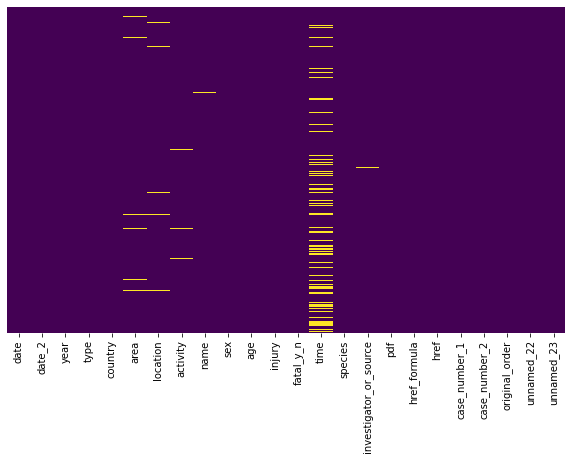

In [3769]:
# Vemos en la grafica los valores nulos que hemos quitado.

plt.figure(figsize=(10,6))

sns.heatmap(data_sharks.isna(),
           yticklabels=False,
           cmap='viridis',
           cbar = False)

plt.show()

## INSIGHTS:

##### A continuación mostramos algunas gráficas con los datos que hemos obtenido tras la limpieza de este dataset. El resto de insights y su explicación está en el powerpoint.

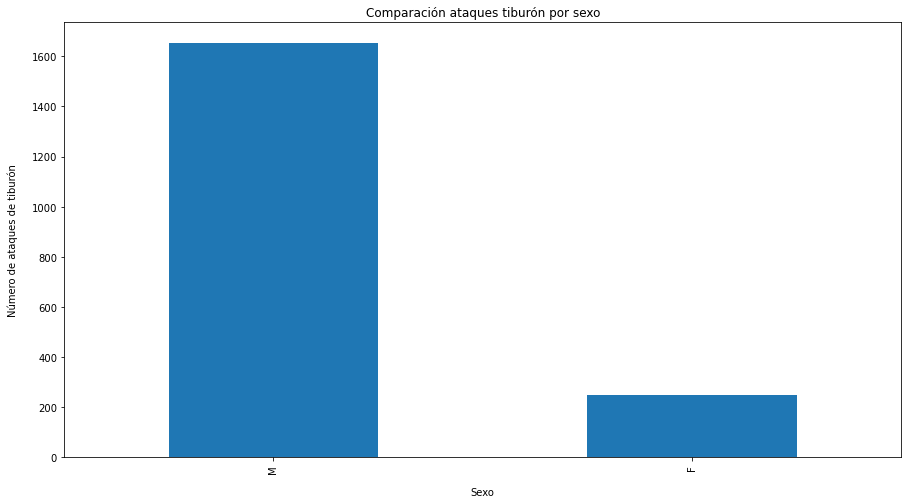

In [3778]:
plt.figure(figsize=(15, 8))

data_sharks.sex.value_counts().plot.bar();
plt.xlabel("Sexo", labelpad=14)
plt.ylabel("Número de ataques de tiburón", labelpad=14)
plt.title("Comparación ataques tiburón por sexo");

In [3789]:
data_sharks.sex.value_counts()

M    1653
F     247
Name: sex, dtype: int64

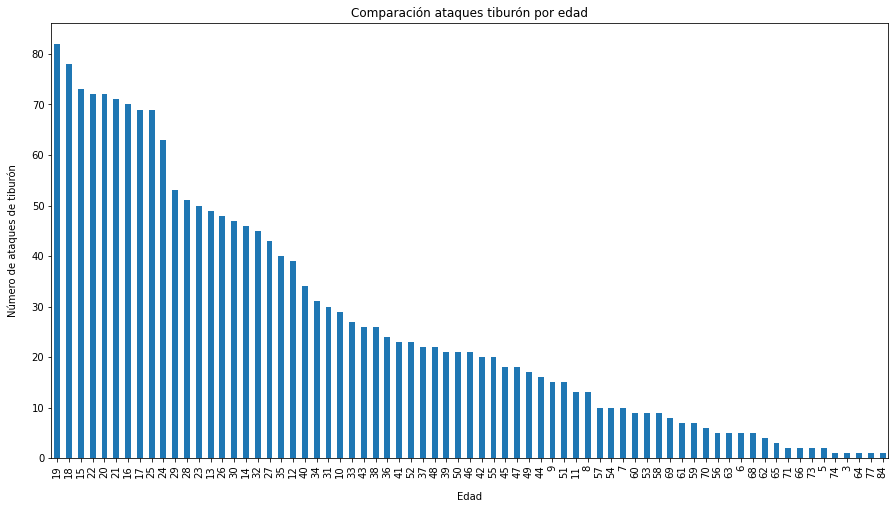

In [3780]:
plt.figure(figsize=(15, 8))

data_sharks.age.value_counts().plot.bar();
plt.xlabel("Edad", labelpad=14)
plt.ylabel("Número de ataques de tiburón", labelpad=14)
plt.title("Comparación ataques tiburón por edad");

In [3802]:
dataage = data_sharks.age.value_counts()
print(*dataage)

82 78 73 72 72 71 70 69 69 63 53 51 50 49 48 47 46 45 43 40 39 34 31 30 29 27 26 26 24 23 23 22 22 21 21 21 20 20 18 18 17 16 15 15 13 13 10 10 10 9 9 9 8 7 7 6 5 5 5 5 4 3 2 2 2 2 1 1 1 1 1


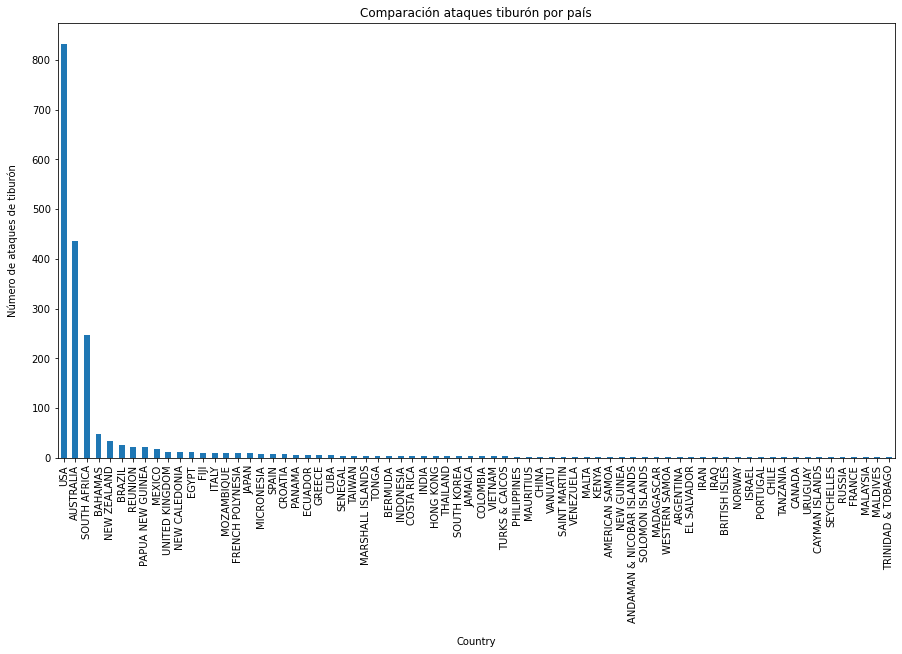

In [3782]:
plt.figure(figsize=(15, 8))

data_sharks.country.value_counts().plot.bar();
plt.xlabel("Country", labelpad=14)
plt.ylabel("Número de ataques de tiburón", labelpad=14)
plt.title("Comparación ataques tiburón por país");

In [3791]:
data_sharks.country.value_counts()

USA                  833
AUSTRALIA            437
SOUTH AFRICA         246
BAHAMAS               47
NEW ZEALAND           33
                    ... 
RUSSIA                 1
FRANCE                 1
MALAYSIA               1
MALDIVES               1
TRINIDAD & TOBAGO      1
Name: country, Length: 72, dtype: int64

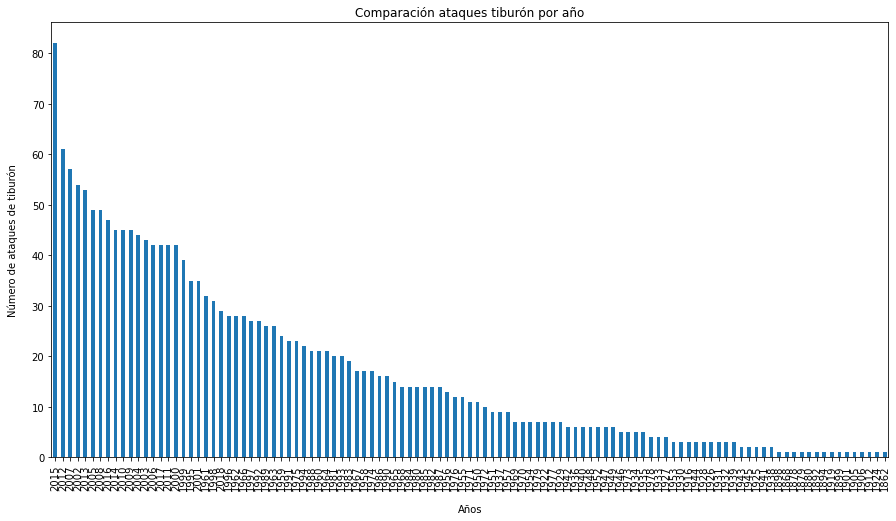

In [3784]:
plt.figure(figsize=(15, 8))

data_sharks.year.value_counts().plot.bar();
plt.xlabel("Años", labelpad=14)
plt.ylabel("Número de ataques de tiburón", labelpad=14)
plt.title("Comparación ataques tiburón por año");

In [3792]:
data_sharks.year.value_counts()

2015    82
2012    61
2007    57
2002    54
2013    53
        ..
1905     1
1906     1
1912     1
1924     1
1862     1
Name: year, Length: 111, dtype: int64

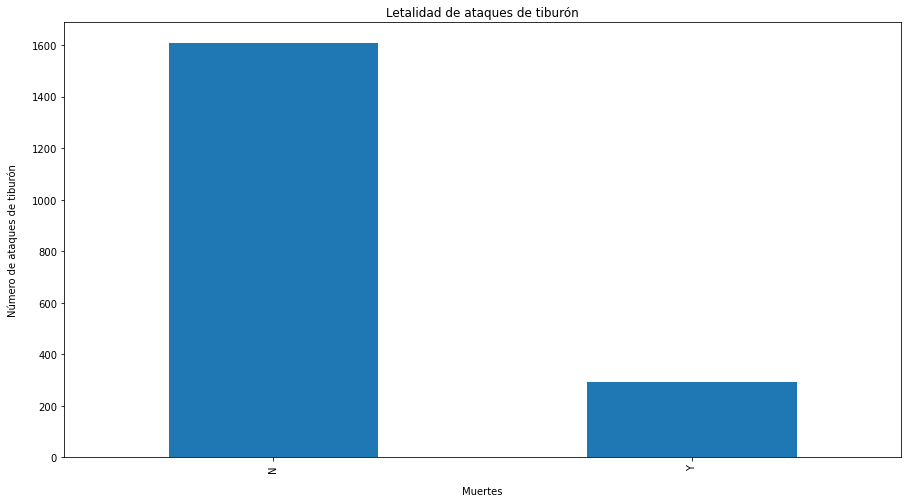

In [3786]:
plt.figure(figsize=(15, 8))

data_sharks.fatal_y_n.value_counts().plot.bar();
plt.xlabel("Muertes", labelpad=14)
plt.ylabel("Número de ataques de tiburón", labelpad=14)
plt.title("Letalidad de ataques de tiburón");

In [3795]:
data_sharks.fatal_y_n.value_counts()

N    1608
Y     292
Name: fatal_y_n, dtype: int64

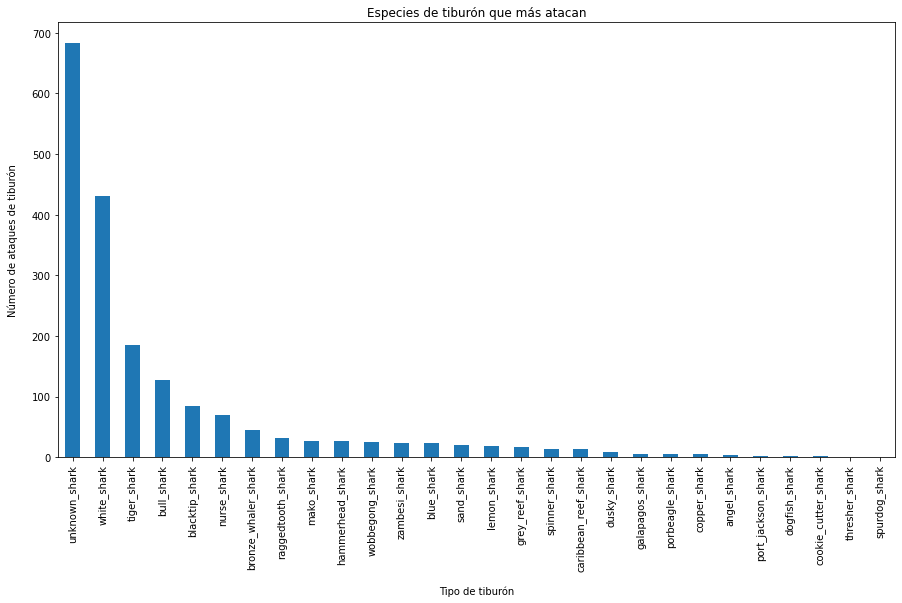

In [3796]:
plt.figure(figsize=(15, 8))

data_sharks.species.value_counts().plot.bar();
plt.xlabel("Tipo de tiburón", labelpad=14)
plt.ylabel("Número de ataques de tiburón", labelpad=14)
plt.title("Especies de tiburón que más atacan");

In [3797]:
data_sharks.species.value_counts()

unknown_shark           683
white_shark             431
tiger_shark             185
bull_shark              128
blacktip_shark           84
nurse_shark              69
bronze_whaler_shark      45
raggedtooth_shark        31
mako_shark               26
hammerhead_shark         26
wobbegong_shark          25
zambesi_shark            24
blue_shark               23
sand_shark               20
lemon_shark              19
grey_reef_shark          16
spinner_shark            14
caribbean_reef_shark     13
dusky_shark               9
galapagos_shark           6
porbeagle_shark           6
copper_shark              5
angel_shark               4
port_jackson_shark        2
dogfish_shark             2
cookie_cutter_shark       2
thresher_shark            1
spurdog_shark             1
Name: species, dtype: int64

In [3798]:
data_sharks.to_csv('sharks_clean.csv', sep=',', index=False)